3.5.2	Analyse Exploratoire des Données


In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd

# Charger le fichier Excel directement depuis l'environnement Colab
file_path = 'startup_db.xlsx'  # Chemin où se trouve le fichier

# Charger le fichier Excel dans un DataFrame Pandas nommé 'data'
data = pd.read_excel(file_path)

# Afficher les premières lignes pour vérifier le chargement
print(data.head())
print(data.info())


  startup_name                                        description  \
0         10er  Hi! I am currently working at Elastic making s...   
1    40-aprons  My name is Cheryl Malik, and I'm a law school ...   
2         akko  We are Jared Brier and Eric Schneider, and we'...   
3       aplano  My name is Tadeus Gregorian, I am 32 years old...   
4         aura  I grew up in Florida without much exposure to ...   

             categorie           pays  ouverture resultat  \
0  Software & Hardware        Denmark       2014   active   
1      Food & Beverage  United States       2017   active   
2             Services  United States       2018   active   
3  Software & Hardware        Germany       2018   active   
4  Software & Hardware  United States       2016   active   

                                              raison fermeture  \
0  Experience of the Founder, Profitability, Stro...       NaN   
1  Experience of the Founder, Robust Business Mod...       NaN   
2  Experience of the

A.	Gestion des Valeurs Manquantes

In [ ]:
import pandas as pd
from google.colab import files

# Étape 1: Charger le fichier Excel
file_path = '/content/startup_db.xlsx'  # Chemin où se trouve votre fichier
data = pd.read_excel(file_path)

# Étape 2: Remplacer les valeurs manquantes dans la colonne 'fermeture'
data['fermeture'] = data['fermeture'].fillna('active')

# Étape 3: Remplacer les valeurs manquantes dans les colonnes 'Total_funding' et 'Profit'
data['Total_funding'] = data['Total_funding'].fillna(-1)
data['Profit'] = data['Profit'].fillna(-1)

# Afficher les résultats pour vérifier les modifications
print("\nAperçu des données après transformation:")
print(data.head())

# Sauvegarder et Télécharger le fichier modifié
output_file_path = 'startup_db_step1.csv'
data.to_csv(output_file_path, index=False)
print(f"\nLe fichier modifié a été sauvegardé en tant que '{output_file_path}'.")




Aperçu des données après transformation:
  startup_name                                        description  \
0         10er  Hi! I am currently working at Elastic making s...   
1    40-aprons  My name is Cheryl Malik, and I'm a law school ...   
2         akko  We are Jared Brier and Eric Schneider, and we'...   
3       aplano  My name is Tadeus Gregorian, I am 32 years old...   
4         aura  I grew up in Florida without much exposure to ...   

             categorie           pays  ouverture resultat  \
0  Software & Hardware        Denmark       2014   active   
1      Food & Beverage  United States       2017   active   
2             Services  United States       2018   active   
3  Software & Hardware        Germany       2018   active   
4  Software & Hardware  United States       2016   active   

                                              raison fermeture  \
0  Experience of the Founder, Profitability, Stro...    active   
1  Experience of the Founder, Robust Busines

B.	Transformer les valeurs du colonne Nombre d’employé

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Étape 1: Charger le fichier CSV
file_path = 'startup_db_step1.csv'  # Chemin où se trouve votre fichier CSV
data = pd.read_csv(file_path)

# Fonction pour transformer 'nombre_d_employe'
def transform_employees(value):
    if pd.isnull(value):
        return value
    value = str(value).replace(',', '')  # Supprimer les virgules pour éviter les erreurs de conversion
    if value.isdigit():
        return int(value)  # Ne rien faire si c'est un nombre
    if 'to' in value:
        try:
            low, high = map(int, value.split('to'))
            return np.random.randint(low, high + 1)
        except ValueError:
            return value
    if '-' in value:
        try:
            low, high = map(int, value.split('-'))
            return np.random.randint(low, high + 1)
        except ValueError:
            return value
    return value

# Étape 2: Transformer les valeurs dans 'nombre_d_employe'
data['nombre_d_employe'] = data['nombre_d_employe'].apply(transform_employees)

# Assurer que la colonne est de type numérique après les transformations
data['nombre_d_employe'] = pd.to_numeric(data['nombre_d_employe'], errors='coerce')

# Calculer la médiane du nombre d'employés par catégorie
median_employees_by_category = data.groupby('categorie')['nombre_d_employe'].median()

# Fonction pour remplir les champs vides avec la médiane par catégorie
def fill_missing_employees(row):
    if pd.isnull(row['nombre_d_employe']):
        return median_employees_by_category[row['categorie']]
    return row['nombre_d_employe']

# Appliquer la fonction pour remplir les champs vides
data['nombre_d_employe'] = data.apply(fill_missing_employees, axis=1)


# Afficher les résultats pour vérifier les modifications
print("\nAperçu des données après transformation des 'nombre_d_employe':")
print(data[['nombre_d_employe']].head())

# Sauvegarder le fichier modifié
output_file_path = 'startup_db_step2.csv'
data.to_csv(output_file_path, index=False)
print(f"\nLe fichier modifié a été sauvegardé en tant que '{output_file_path}'.")



Aperçu des données après transformation des 'nombre_d_employe':
   nombre_d_employe
0                30
1                10
2                30
3                 5
4                50

Le fichier modifié a été sauvegardé en tant que 'startup_db_step2.csv'.


C.	Transformer les valeurs du champs nombre d’investisseur

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Étape 1: Charger le fichier CSV
file_path = 'startup_db_step2.csv'  # Chemin où se trouve votre fichier CSV
data = pd.read_csv(file_path)

# Fonction pour convertir les valeurs en numérique
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value, errors='coerce')
    except ValueError:
        return np.nan

# Appliquer la conversion sur 'nombre_d_investisseur'
data['nombre_d_investisseur'] = data['nombre_d_investisseur'].apply(convert_to_numeric)

# Calculer la médiane du nombre d'investisseurs par catégorie
median_investors_by_category = data.groupby('categorie')['nombre_d_investisseur'].median()

# Fonction pour remplir les champs vides avec la médiane par catégorie
def fill_missing_investors(row):
    if pd.isnull(row['nombre_d_investisseur']):
        return median_investors_by_category[row['categorie']]
    return row['nombre_d_investisseur']

# Appliquer la fonction pour remplir les champs vides
data['nombre_d_investisseur'] = data.apply(fill_missing_investors, axis=1)

# Afficher les résultats pour vérifier les modifications
print("\nAperçu des données après transformation des 'nombre_d_investisseur':")
print(data[['categorie', 'nombre_d_investisseur']].head(10))

# Sauvegarder le fichier modifié
output_file_path = 'startup_db_step3.csv'
data.to_csv(output_file_path, index=False)
print(f"\nLe fichier modifié a été sauvegardé en tant que '{output_file_path}'.")




Aperçu des données après transformation des 'nombre_d_investisseur':
             categorie  nombre_d_investisseur
0  Software & Hardware                    1.0
1      Food & Beverage                    1.0
2             Services                    1.0
3  Software & Hardware                    1.0
4  Software & Hardware                    1.0
5               Design                    1.0
6           e-Commerce                    6.0
7           e-Commerce                    1.0
8  Software & Hardware                    1.0
9            Marketing                    1.0

Le fichier modifié a été sauvegardé en tant que 'startup_db_step3.csv'.


D.	Transformer les valeurs du champs Profit

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Étape 1: Charger le fichier CSV
file_path = 'startup_db_step3.csv'  # Chemin où se trouve votre fichier CSV
data = pd.read_csv(file_path)

# Fonction pour convertir les valeurs en numériques
def convert_to_number(value):
    try:
        # Supprimer les caractères spéciaux
        value = value.replace('$', '').replace('/mo', '').replace(' ', '').replace('.', '').replace('year', '').replace('million', '').replace('month.', '').replace('/', '').replace('+', '')
        value = value.replace('k', '000').replace('M', '000000')  # Remplacer k par 000 et M par 000000

        if '-' in value:
            low, high = value.split('-')
            low = int(low)
            high = int(high)
            return np.random.randint(low, high + 1)

        if value.isdigit():
            num_value = int(value)
            if num_value == 0:  # Considérer 0 comme une valeur manquante
                return np.nan
            if num_value < 10000:  # multiplier par 1000 si le nombre a 4 chiffres ou moins
                return num_value * 1000
            return num_value
        else:
            return float(value)
    except ValueError:
        return np.nan

# Fonction pour transformer les valeurs en numériques
def transform_profit(value):
    if pd.isnull(value) or value == 'No Data' or value == '0':
        return np.nan  # Traiter 'No Data' et '0' comme NaN

    value = str(value).replace(',', '')  # Supprimer les virgules pour éviter les erreurs de conversion
    return convert_to_number(value)

# Appliquer la transformation sur 'Profit'
data['Profit'] = data['Profit'].apply(transform_profit)

# Assurer que la colonne est de type numérique après les transformations
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

# Calculer la médiane du profit par catégorie pour les valeurs manquantes
median_profit_by_category = data.groupby('categorie')['Profit'].median()

# Fonction pour remplir les champs vides avec la médiane par catégorie
def fill_missing_profit(row):
    if pd.isnull(row['Profit']):
        return median_profit_by_category[row['categorie']]
    return row['Profit']

# Appliquer la fonction pour remplir les champs vides
data['Profit'] = data.apply(fill_missing_profit, axis=1)

# Afficher les résultats pour vérifier les modifications
print("\nAperçu des données après transformation des 'Profit':")
print(data[['categorie', 'Profit']].head(10))

# Sauvegarder et Télécharger le fichier modifié
output_file_path = 'startup_db_step4.csv'
data.to_csv(output_file_path, index=False)
print(f"\nLe fichier modifié a été sauvegardé en tant que '{output_file_path}'.")




Aperçu des données après transformation des 'Profit':
             categorie    Profit
0  Software & Hardware    5345.0
1      Food & Beverage   11000.0
2             Services  179471.0
3  Software & Hardware   11775.0
4  Software & Hardware   19155.0
5               Design  232447.0
6           e-Commerce   16302.0
7           e-Commerce  252362.0
8  Software & Hardware   35978.0
9            Marketing   19441.0

Le fichier modifié a été sauvegardé en tant que 'startup_db_step4.csv'.


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Étape 1: Charger le fichier CSV
file_path = 'startup_db_step4.csv'  # Chemin où se trouve votre fichier CSV
data = pd.read_csv(file_path)

# Fonction pour convertir les valeurs en numériques
def convert_to_number(value):
    try:
        # Supprimer les caractères spéciaux
        value = value.replace('$', '').replace('/mo', '').replace(' ', '').replace('. ', '').replace('year', '').replace('million', '').replace('month.', '').replace('/', '').replace('+', '')
        value = value.replace('k', '000').replace('M', '000000')  # Remplacer k par 000 et M par 000000

        if '-' in value:
            low, high = value.split('-')
            low = int(low)
            high = int(high)
            return np.random.randint(low, high + 1)

        if value.isdigit():
            num_value = int(value)
            if num_value == 0:  # Considérer 0 comme une valeur manquante
                return np.nan
            if num_value < 10000:  # multiplier par 1000 si le nombre a 4 chiffres ou moins
                return num_value * 1000
            return num_value
        else:
            return float(value)
    except ValueError:
        return np.nan

# Fonction pour transformer les valeurs en numériques
def transform_value(value):
    if pd.isnull(value) or value == 'No Data' or value == '0':
        return np.nan  # Traiter 'No Data' et '0' comme NaN

    value = str(value).replace(',', '')  # Supprimer les virgules pour éviter les erreurs de conversion
    return convert_to_number(value)

# Appliquer la transformation sur 'Profit' pour les startups actives
data['Profit'] = data['Profit'].apply(transform_value)

# Assurer que la colonne est de type numérique après les transformations
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

# Calculer la médiane du profit par catégorie pour les valeurs manquantes
median_profit_by_category = data.groupby('categorie')['Profit'].median()

# Fonction pour remplir les champs vides avec la médiane par catégorie
def fill_missing_profit(row):
    if pd.isnull(row['Profit']):
        return median_profit_by_category[row['categorie']]
    return row['Profit']

# Appliquer la fonction pour remplir les champs vides
data['Profit'] = data.apply(fill_missing_profit, axis=1)

# Assurer que les colonnes 'ouverture' et 'fermeture' sont de type année uniquement
def extract_year(date):
    if pd.isnull(date) or date == '':
        return np.nan
    date = str(date)
    if len(date) == 4 and date.isdigit():
        return int(date)
    if '/' in date:
        return int(date.split('/')[-1])
    return np.nan

data['ouverture'] = data['ouverture'].apply(extract_year)
data['fermeture'] = data['fermeture'].apply(extract_year)

# Fonction pour transformer les valeurs de Total_funding
def transform_total_funding(row):
    if row['resultat'] == 'active':
        return row['Total_funding']

    if pd.isnull(row['Total_funding']) or row['Total_funding'] == 'No Data' or row['Total_funding'] == '0':
        row['Total_funding'] = np.nan  # Traiter 'No Data' et '0' comme NaN

    ouverture = row['ouverture']
    fermeture = row['fermeture']
    nombre_d_employe = row['nombre_d_employe']

    if pd.isnull(ouverture) or pd.isnull(fermeture) or pd.isnull(nombre_d_employe):
        return row['Total_funding']  # Si des valeurs nécessaires sont manquantes, ne rien faire

    nauveau_total_funding = 6300 * (fermeture - ouverture) * nombre_d_employe * 12 * 2

    if row['raison'] == 'Lack of Funds':
        if nauveau_total_funding > row['Total_funding']:
            return nauveau_total_funding / 2.1
        elif row['Total_funding'] > nauveau_total_funding * 1.7:
            return nauveau_total_funding
    else:
        if nauveau_total_funding > row['Total_funding']:
            return nauveau_total_funding
        elif row['Total_funding'] > nauveau_total_funding * 1.7:
            return nauveau_total_funding

    return row['Total_funding']

# Assurer que la colonne 'Total_funding' est de type numérique
data['Total_funding'] = data['Total_funding'].apply(transform_value)

# Appliquer la transformation sur 'Total_funding' pour les entreprises non actives
data.loc[data['resultat'] != 'active', 'Total_funding'] = data.loc[data['resultat'] != 'active'].apply(transform_total_funding, axis=1)

# Calculer la médiane du total_funding par catégorie pour les valeurs manquantes
median_funding_by_category = data.groupby('categorie')['Total_funding'].median()

# Fonction pour remplir les champs vides avec la médiane par catégorie
def fill_missing_funding(row):
    if pd.isnull(row['Total_funding']):
        return median_funding_by_category[row['categorie']]
    return row['Total_funding']

# Appliquer la fonction pour remplir les champs vides
data['Total_funding'] = data.apply(fill_missing_funding, axis=1)

# Afficher les résultats pour vérifier les modifications
print("\nAperçu des données après transformation des 'Profit' et 'Total_funding':")
print(data[['categorie', 'Profit', 'Total_funding']].head(10))

# Sauvegarder et Télécharger le fichier modifié
output_file_path = 'startup_db_step6.csv'
data.to_csv(output_file_path, index=False)
print(f"\nLe fichier modifié a été sauvegardé en tant que '{output_file_path}'.")





Aperçu des données après transformation des 'Profit' et 'Total_funding':
             categorie    Profit  Total_funding
0  Software & Hardware    5345.0     15422400.0
1      Food & Beverage   11000.0     35607600.0
2             Services  179471.0     13834800.0
3  Software & Hardware   11775.0     15422400.0
4  Software & Hardware   19155.0     15422400.0
5               Design  232447.0     12700800.0
6           e-Commerce   16302.0     19958400.0
7           e-Commerce  252362.0     19958400.0
8  Software & Hardware   35978.0     15422400.0
9            Marketing   19441.0     10188000.0

Le fichier modifié a été sauvegardé en tant que 'startup_db_step6.csv'.


In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = 'startup_db_step6.csv'  # Chemin où se trouve votre fichier CSV
data = pd.read_csv(file_path)

# Mettre à jour la colonne 'resultat' en fonction de la colonne 'fermeture'
data['resultat'] = data.apply(lambda row: 'shutdown' if pd.notnull(row['fermeture']) else row['resultat'], axis=1)

# Afficher les résultats pour vérifier les modifications
print("\nAperçu des données après mise à jour des résultats:")
print(data[['fermeture', 'resultat']].head(10))

# Sauvegarder et Télécharger le fichier modifié
output_file_path = 'startup_db_step7.csv'
data.to_csv(output_file_path, index=False)
print(f"\nLe fichier modifié a été sauvegardé en tant que '{output_file_path}'.")





Aperçu des données après mise à jour des résultats:
   fermeture resultat
0        NaN   active
1        NaN   active
2        NaN   active
3        NaN   active
4        NaN   active
5        NaN   active
6        NaN   active
7        NaN   active
8        NaN   active
9        NaN   active

Le fichier modifié a été sauvegardé en tant que 'startup_db_step7.csv'.


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Étape 1: Charger le fichier CSV
file_path = '/content/startup_db_step4.csv'  # Chemin où se trouve votre fichier CSV
data = pd.read_csv(file_path)

# Fonction pour convertir les valeurs en numériques
def convert_to_number(value):
    try:
        # Supprimer les caractères spéciaux
        value = value.replace('$', '').replace('/mo', '').replace(' ', '').replace('. ', '').replace('year', '').replace('million', '').replace('month.', '').replace('/', '').replace('+', '')
        value = value.replace('k', '000').replace('M', '000000')  # Remplacer k par 000 et M par 000000

        if '-' in value:
            low, high = value.split('-')
            low = int(low)
            high = int(high)
            return np.random.randint(low, high + 1)

        if value.isdigit():
            num_value = int(value)
            if num_value == 0:  # Considérer 0 comme une valeur manquante
                return np.nan
            if num_value < 10000:  # multiplier par 1000 si le nombre a 4 chiffres ou moins
                return num_value * 1000
            return num_value
        else:
            return float(value)
    except ValueError:
        return np.nan

# Fonction pour transformer les valeurs en numériques
def transform_value(value):
    if pd.isnull(value) or value == 'No Data' or value == '0':
        return np.nan  # Traiter 'No Data' et '0' comme NaN

    value = str(value).replace(',', '')  # Supprimer les virgules pour éviter les erreurs de conversion
    return convert_to_number(value)

# Appliquer la transformation sur 'Profit' pour les startups actives
data['Profit'] = data['Profit'].apply(transform_value)

# Assurer que la colonne est de type numérique après les transformations
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

# Calculer la médiane du profit par catégorie pour les valeurs manquantes
median_profit_by_category = data.groupby('categorie')['Profit'].median()

# Fonction pour remplir les champs vides avec la médiane par catégorie
def fill_missing_profit(row):
    if pd.isnull(row['Profit']):
        return median_profit_by_category[row['categorie']]
    return row['Profit']

# Appliquer la fonction pour remplir les champs vides
data['Profit'] = data.apply(fill_missing_profit, axis=1)

# Assurer que les colonnes 'ouverture' et 'fermeture' sont de type année uniquement
def extract_year(date):
    if pd.isnull(date) or date == '':
        return np.nan
    date = str(date)
    if len(date) == 4 and date.isdigit():
        return int(date)
    if '/' in date:
        return int(date.split('/')[-1])
    return np.nan

data['ouverture'] = data['ouverture'].apply(extract_year)
data['fermeture'] = data['fermeture'].apply(extract_year)

# Fonction pour transformer les valeurs de Total_funding
def transform_total_funding(row):
    if row['resultat'] == 'active':
        return row['Total_funding']

    if pd.isnull(row['Total_funding']) or row['Total_funding'] == 'No Data' or row['Total_funding'] == '0':
        row['Total_funding'] = np.nan  # Traiter 'No Data' et '0' comme NaN

    ouverture = row['ouverture']
    fermeture = row['fermeture']
    nombre_d_employe = row['nombre_d_employe']

    if pd.isnull(ouverture) or pd.isnull(fermeture) or pd.isnull(nombre_d_employe):
        return row['Total_funding']  # Si des valeurs nécessaires sont manquantes, ne rien faire

    if row['raison'] == 'Lack of Funds':
        nauveau_total_funding = 6300 * (fermeture - ouverture) * nombre_d_employe * 12 * 2
        if nauveau_total_funding > row['Total_funding']:
            return nauveau_total_funding / 2.1
    else:
        nauveau_total_funding = 6300 * (fermeture - ouverture) * nombre_d_employe * 12 * 2
        if nauveau_total_funding > row['Total_funding']:
            return nauveau_total_funding

    return row['Total_funding']

# Assurer que la colonne 'Total_funding' est de type numérique
data['Total_funding'] = data['Total_funding'].apply(transform_value)

# Appliquer la transformation sur 'Total_funding' pour les entreprises non actives
data.loc[data['resultat'] != 'active', 'Total_funding'] = data.loc[data['resultat'] != 'active'].apply(transform_total_funding, axis=1)


# Afficher les résultats pour vérifier les modifications
print("\nAperçu des données après transformation des 'Profit' et 'Total_funding':")
print(data[['categorie', 'Profit', 'Total_funding']].head(10))

# Sauvegarder le fichier modifié
output_file_path = 'startup_db_step8.csv'
data.to_csv(output_file_path, index=False)
print(f"\nLe fichier modifié a été sauvegardé en tant que '{output_file_path}'.")




Le fichier modifié a été sauvegardé en tant que 'startup_db_step8.csv'.


           startup_name                                        description  \
0  dream-client-academy  Hey everyone ! My name is Alex Albarran, I'm 2...   
1              mailbrew  Hi Failory, thanks so much for this interview....   
2        pull-reminders  I'm a 27-year-old developer based out of Chica...   
3           resumemaker  My name is Fernando Pessagno, I am a 35 years ...   
4              habitify  Hello! I'm Alan, growth lead at Habitify, the ...   

             categorie           pays  ouverture resultat  \
0            Marketing  United States       2017   active   
1         Productivity          Italy       2018   active   
2  Software & Hardware  United States       2016   active   
3         Productivity      Argentina       2020   active   
4         Productivity        Vietnam       2018   active   

                                              raison  fermeture  \
0  Robust Business Model, Market and Network, Pro...         -1   
1  Experience of the Founder, 

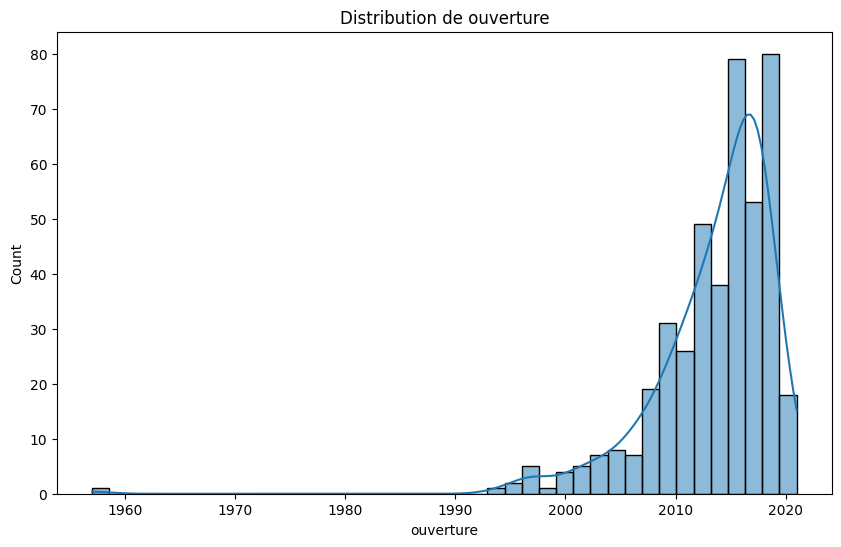

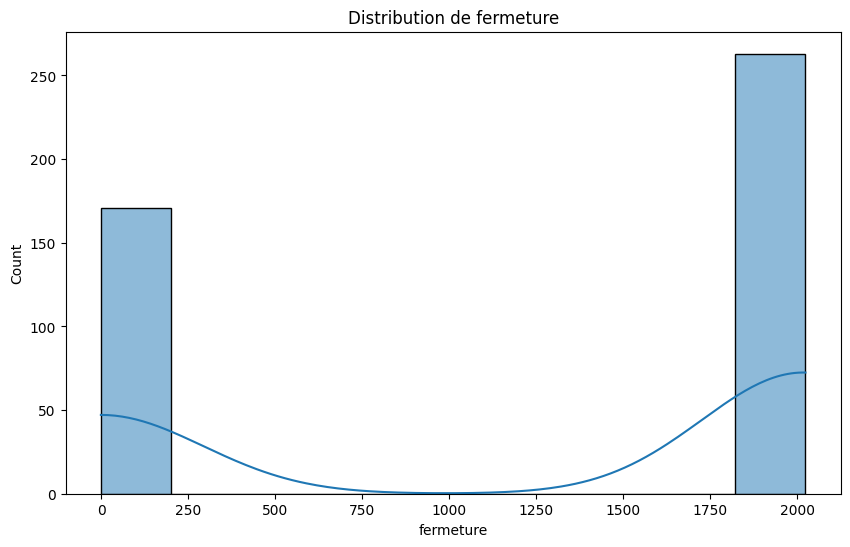

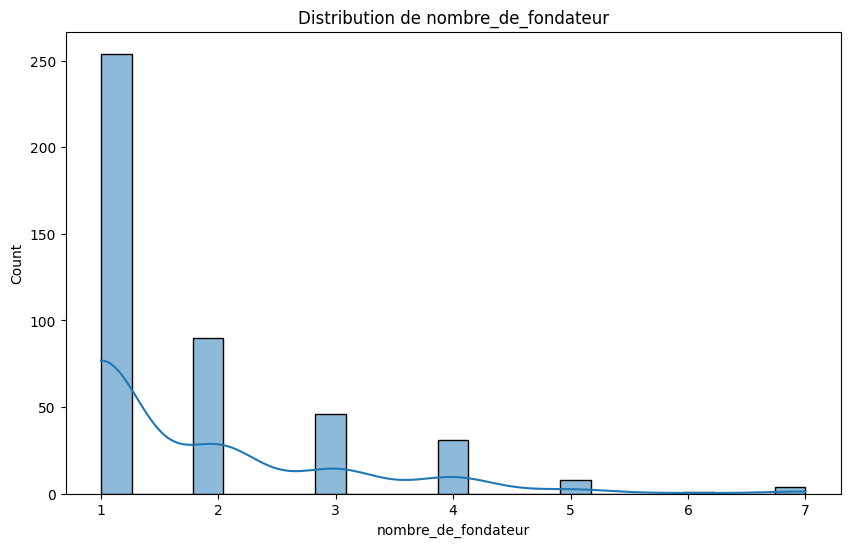

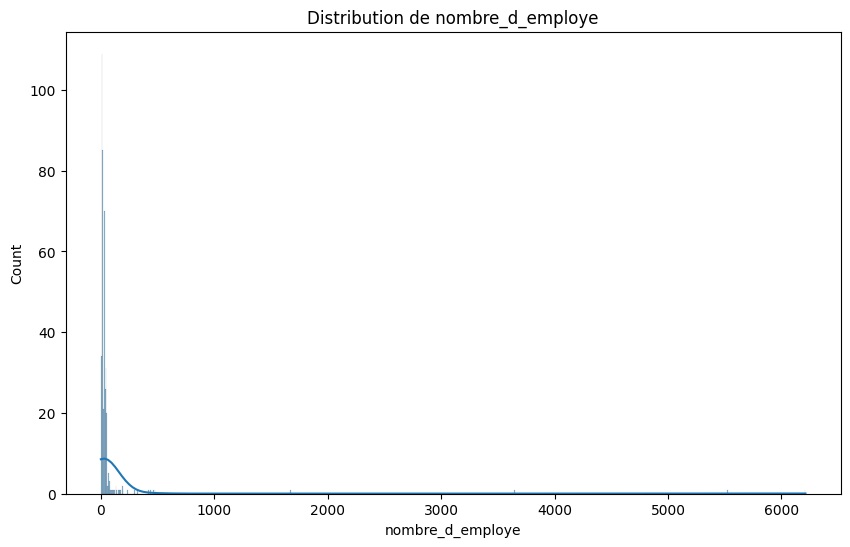

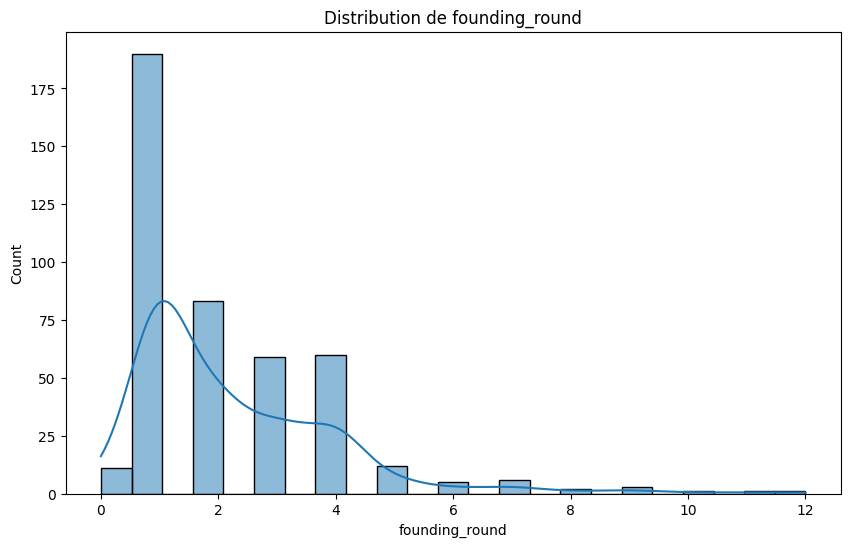

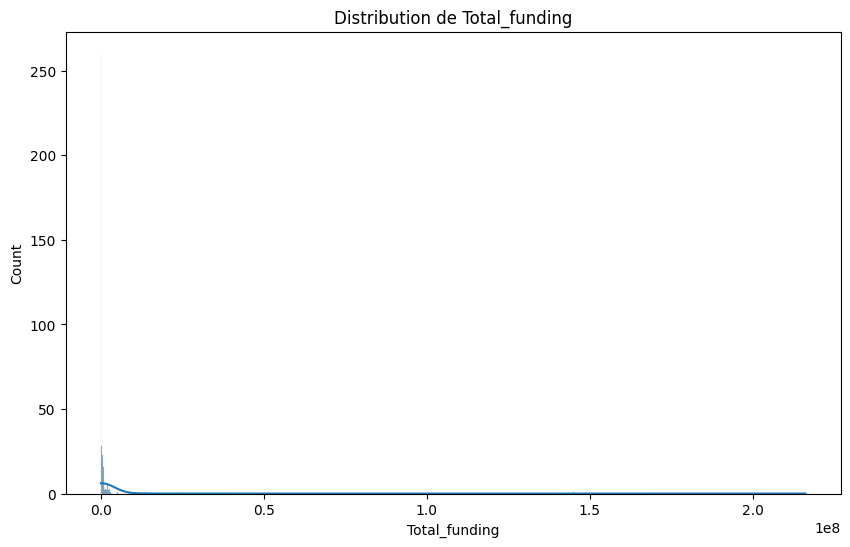

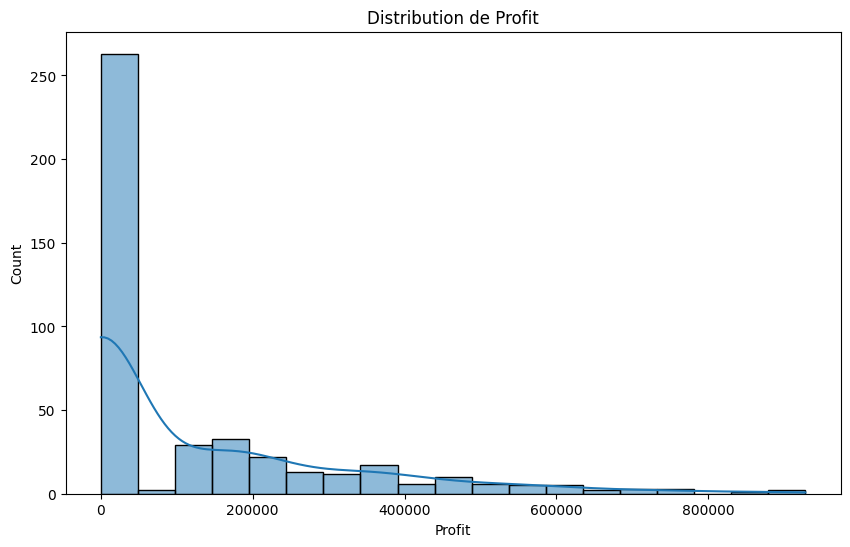

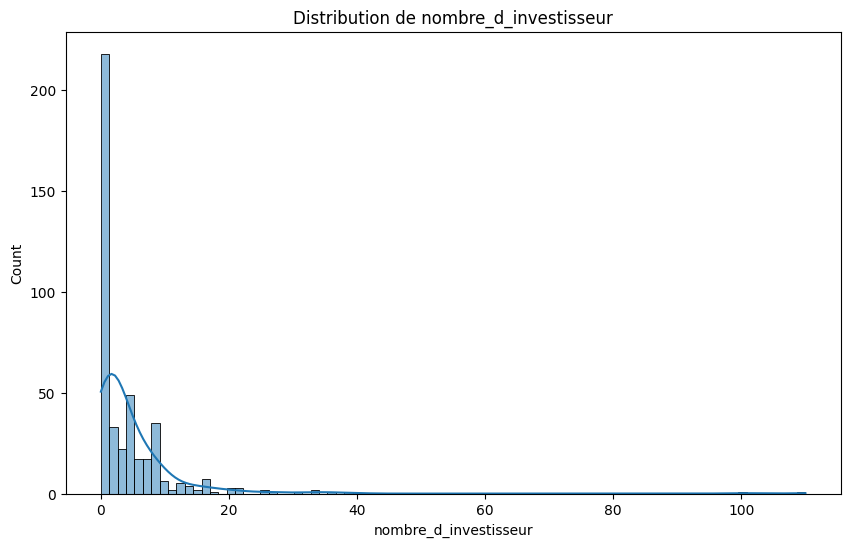

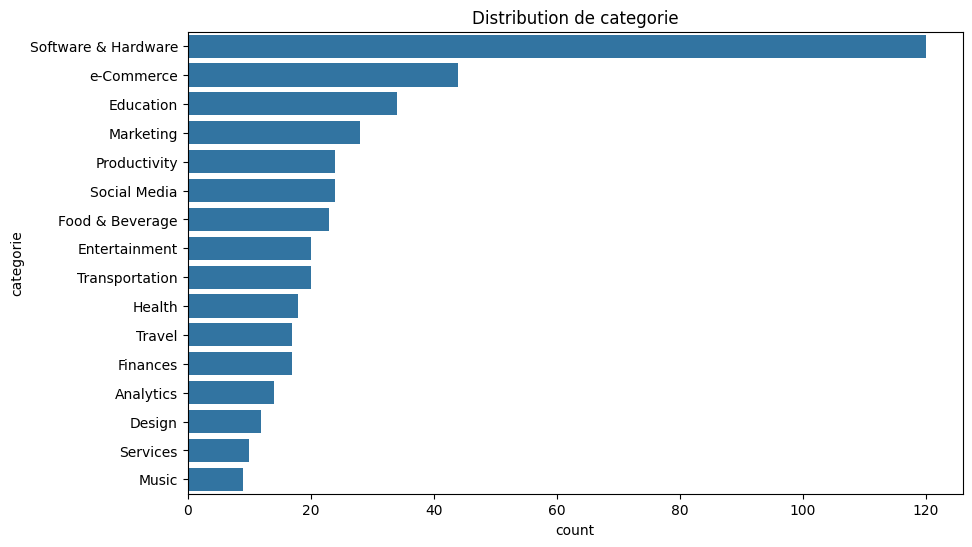

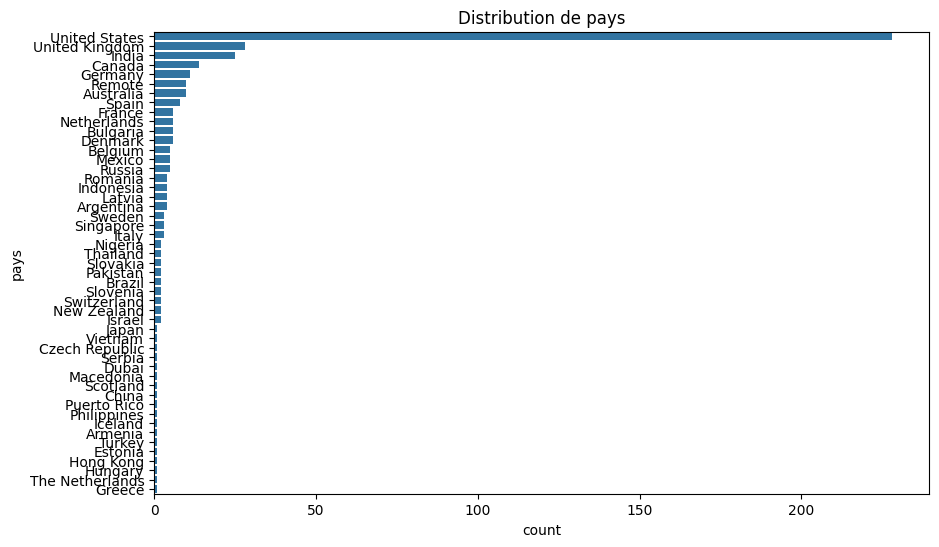

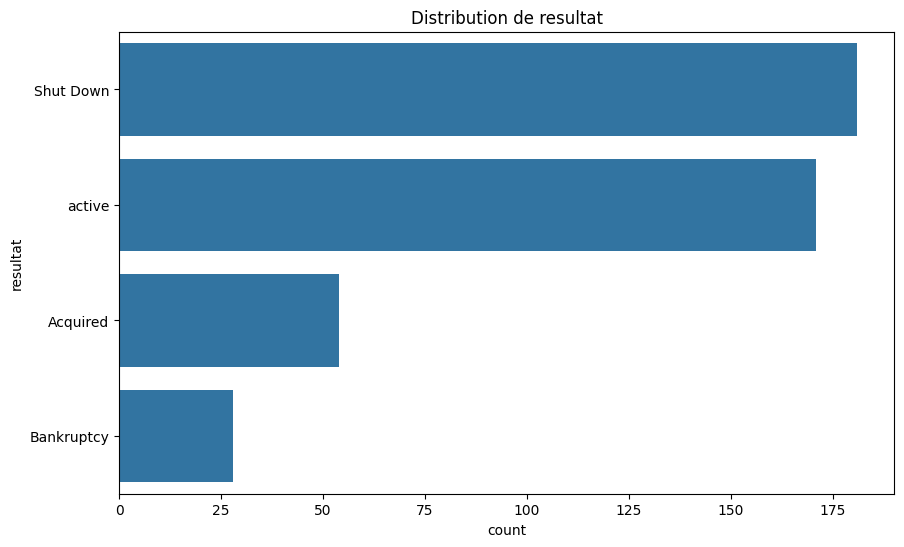

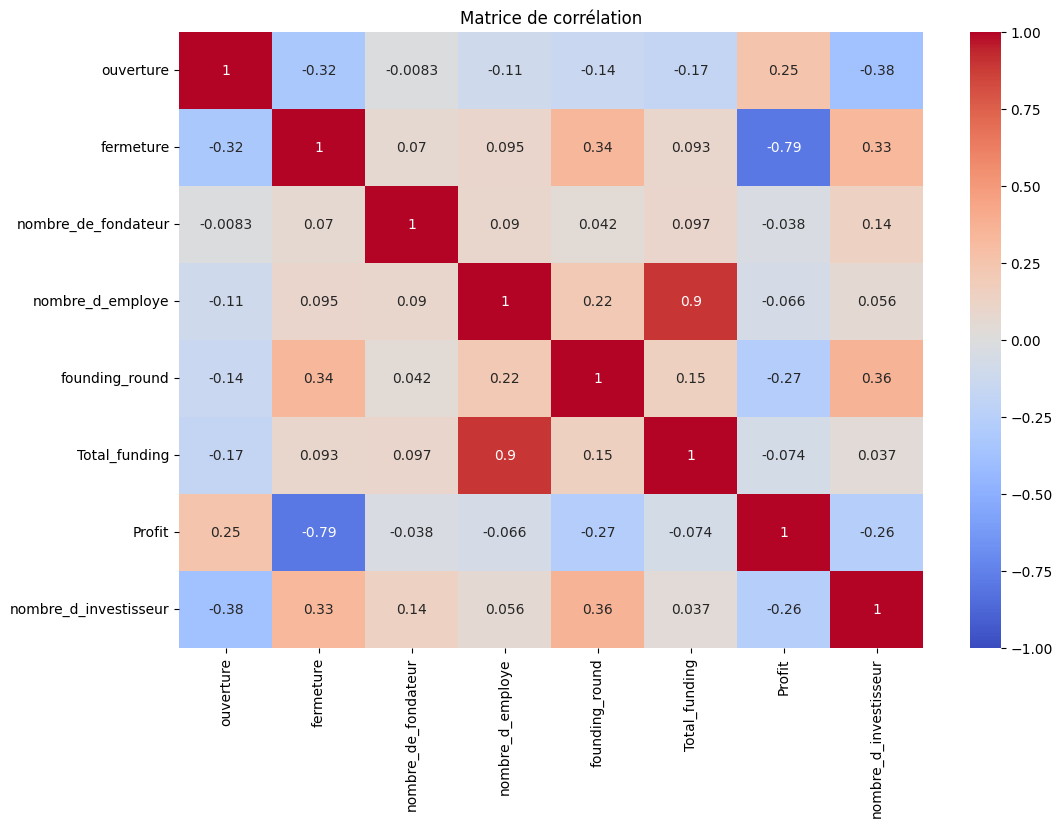

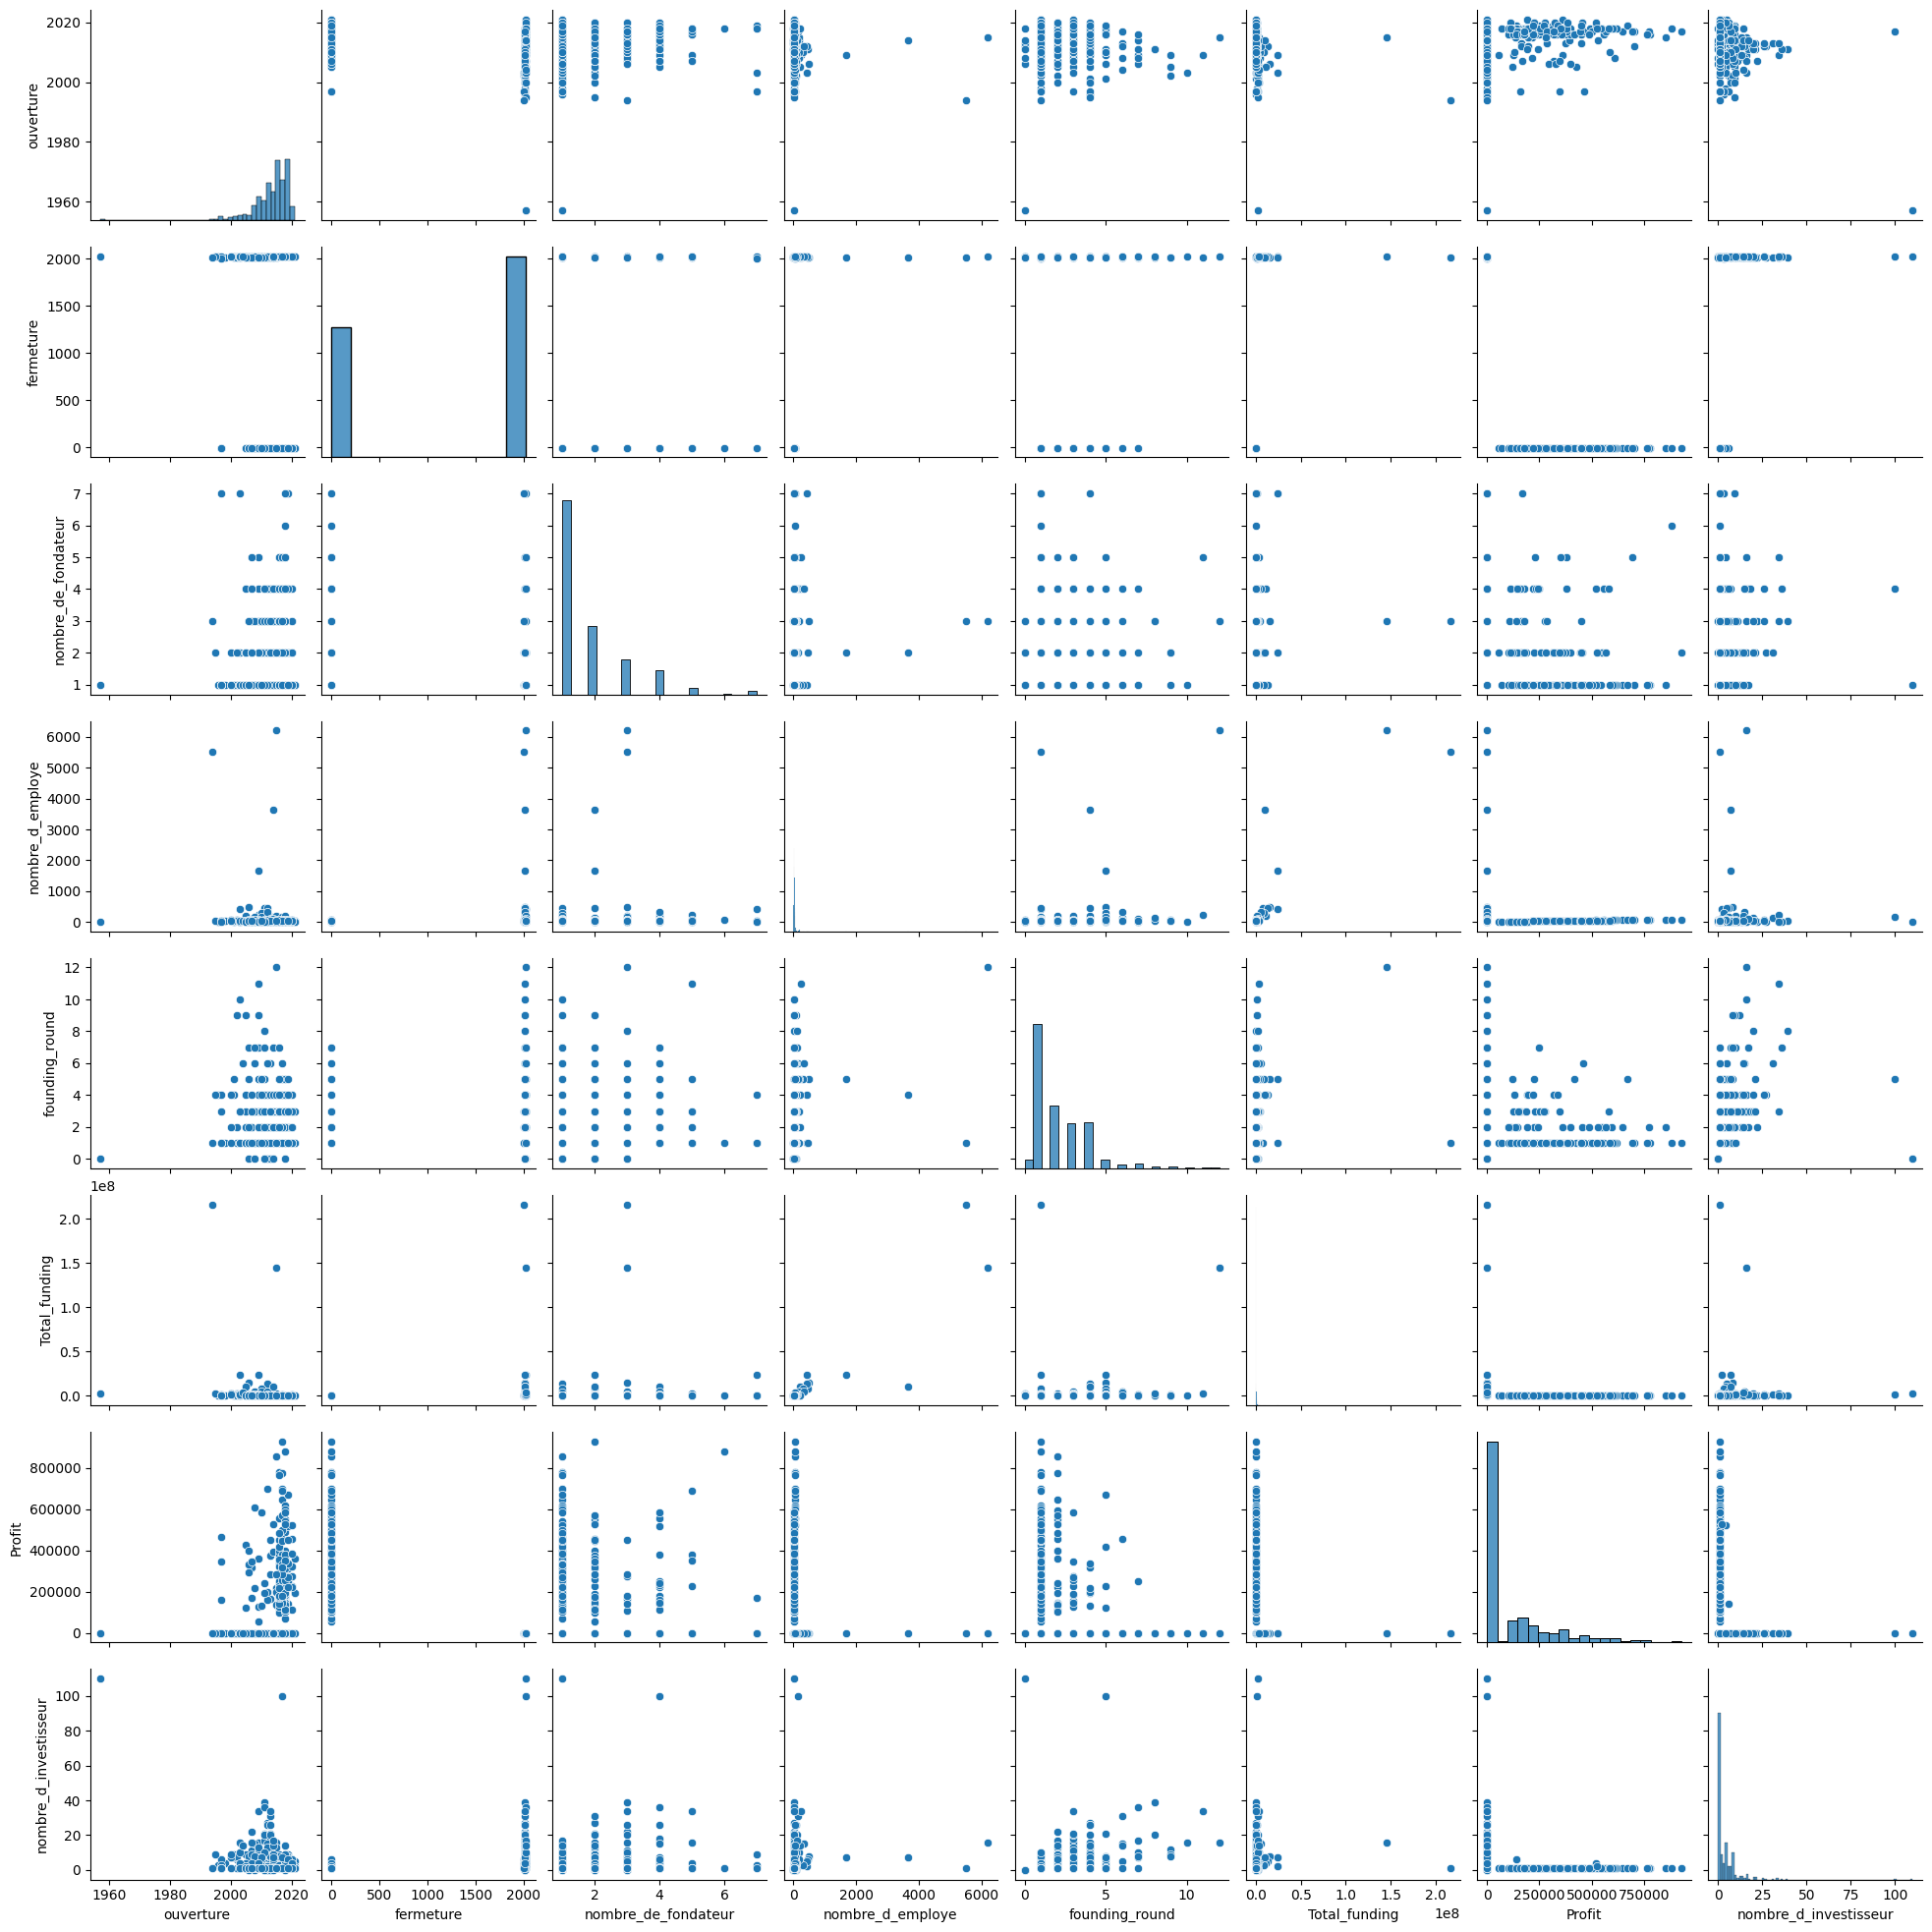

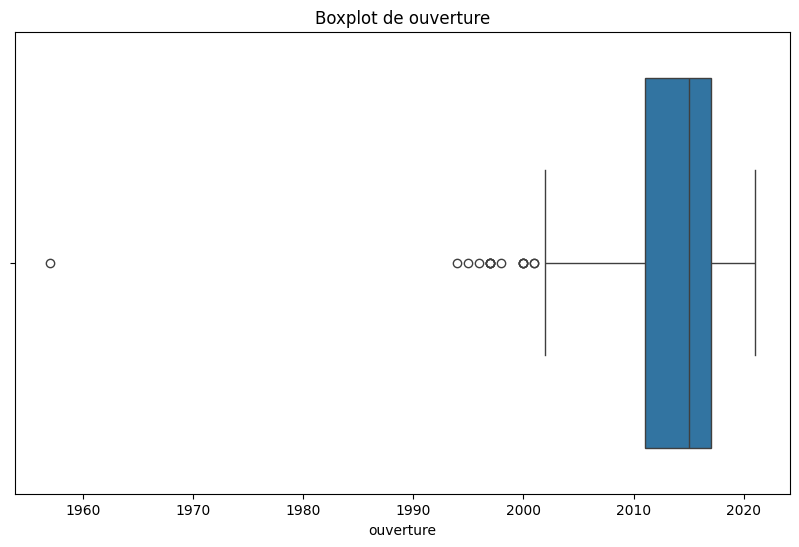

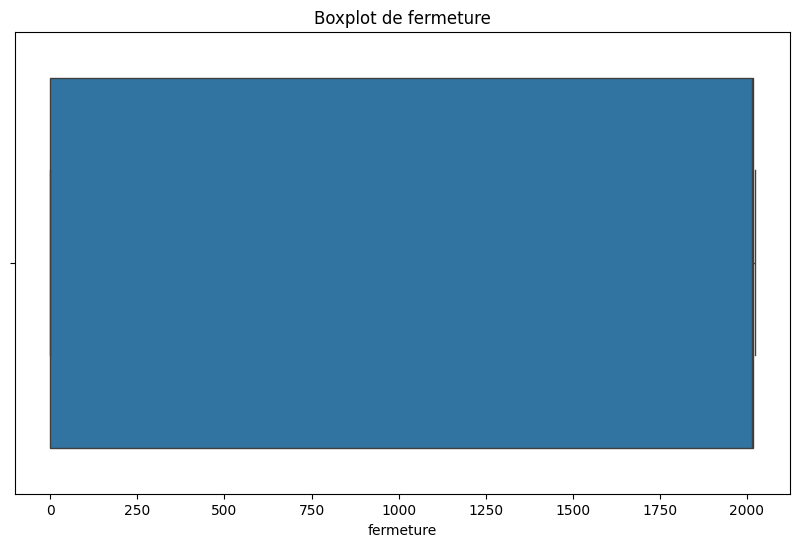

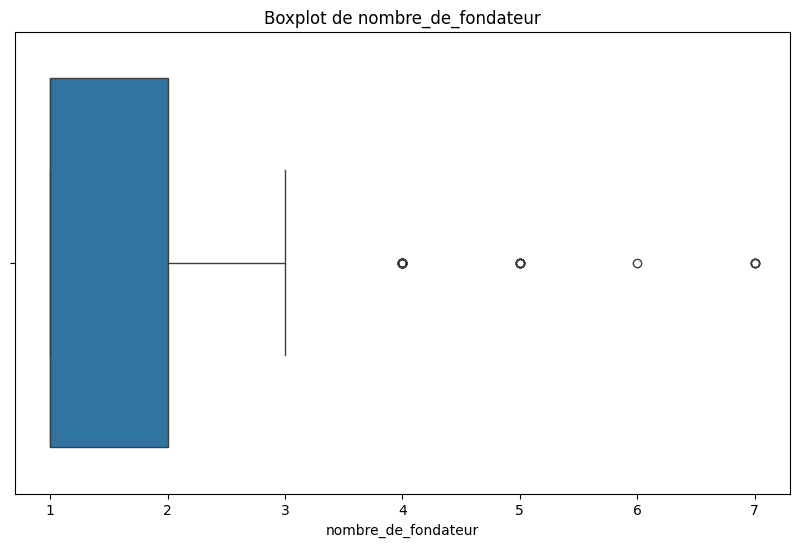

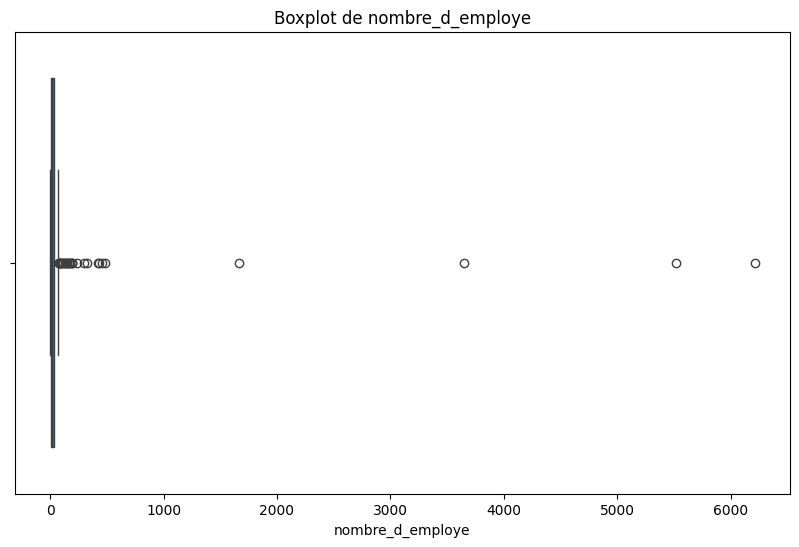

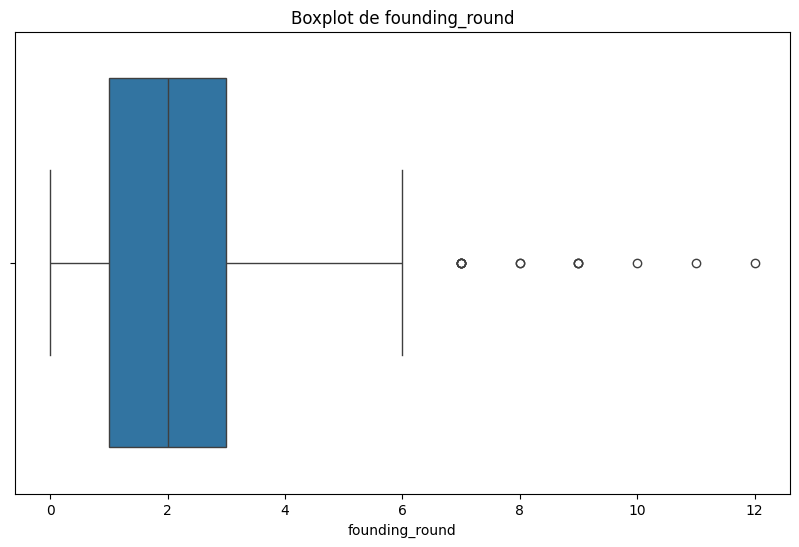

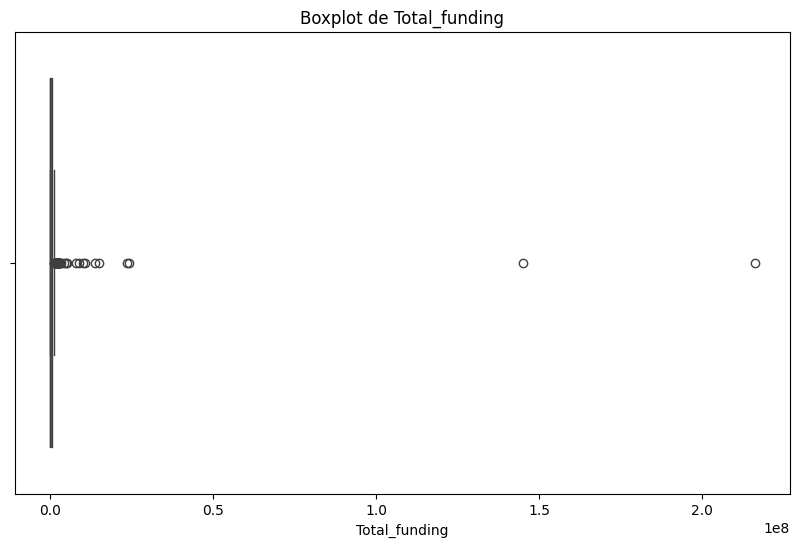

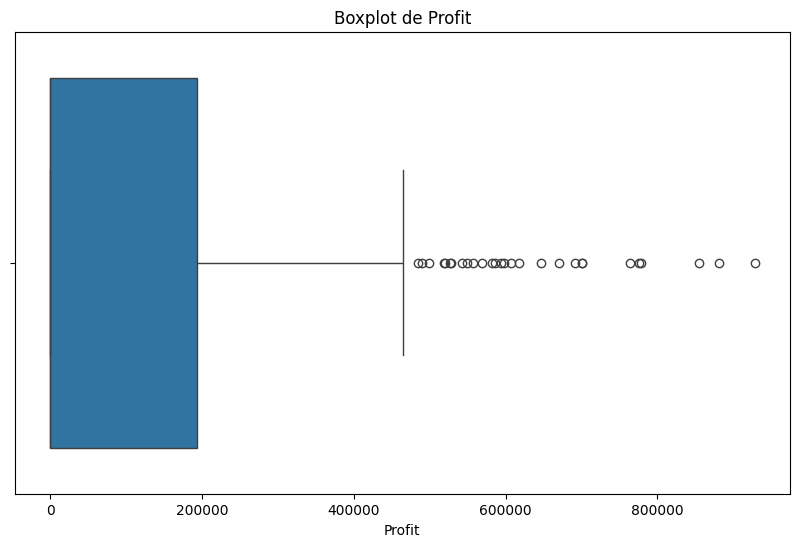

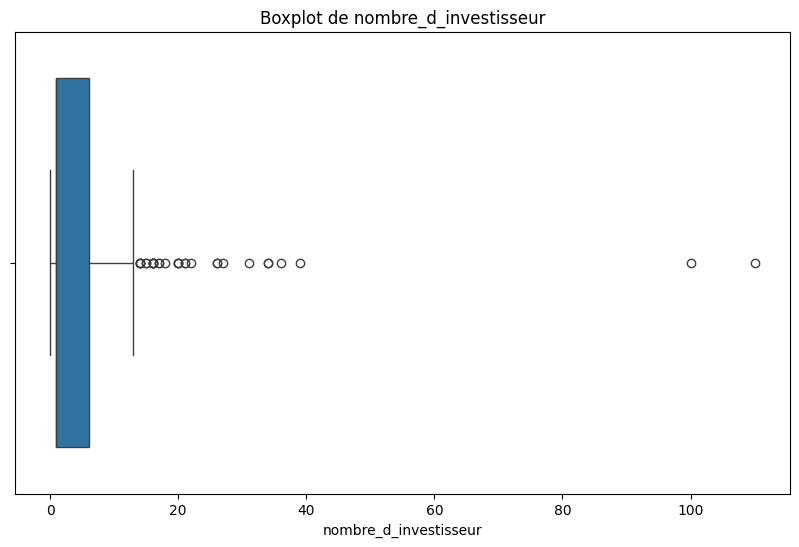

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV
file_path = '/content/startup_db_EDA.csv'
data = pd.read_csv(file_path)

# Affichage des premières lignes du dataset pour comprendre sa structure
print(data.head())

# Affichage des informations générales sur le dataset
print(data.info())

# Description statistique du dataset
print(data.describe())

# Affichage des distributions des variables numériques
numerical_columns = ['ouverture', 'fermeture', 'nombre_de_fondateur', 'nombre_d_employe', 'founding_round', 'Total_funding', 'Profit', 'nombre_d_investisseur']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()

# Affichage des distributions des variables catégorielles
categorical_columns = ['categorie', 'pays', 'resultat']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution de {col}')
    plt.show()

# Matrice de corrélation pour les variables numériques
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()

# Analyse des relations entre certaines variables
sns.pairplot(data[numerical_columns])
plt.show()

# Boxplots pour détecter les outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Charger le fichier CSV
file_path = 'startup_db_EDA.csv'
data = pd.read_csv(file_path)

# Remplacer les valeurs -1 par NaN
data.replace(-1, pd.NA, inplace=True)

# Encoder les colonnes catégorielles et traiter les valeurs manquantes
categorical_features = ['categorie', 'pays']
numerical_features = ['ouverture', 'fermeture', 'nombre_de_fondateur', 'nombre_d_employe', 'founding_round', 'Total_funding', 'Profit', 'nombre_d_investisseur']

# Préparer les transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Créer le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Diviser les données en ensembles d'entraînement et de test
X = data[categorical_features + numerical_features]
y = data['resultat'].apply(lambda x: 1 if x == 'active' else 0)  # Encodage de la variable cible

# Remplacer toutes les valeurs manquantes par une valeur appropriée avant de diviser les données
X[categorical_features] = X[categorical_features].fillna(X[categorical_features].mode().iloc[0])
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner les modèles
# Régression logistique
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression())])

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Régression logistique - Exactitude:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Forêts Aléatoires
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Forêts Aléatoires - Exactitude:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


<ipython-input-8-80f6f2febd1b>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].fillna(X[categorical_features].mode().iloc[0])
<ipython-input-8-80f6f2febd1b>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())


Régression logistique - Exactitude: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        49
           1       0.84      0.84      0.84        38

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87

Forêts Aléatoires - Exactitude: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        38

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



In [ ]:
!pip install tensorflow


In [ ]:
# Installer les bibliothèques nécessaires
!pip install tensorflow scikit-learn

# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Charger le fichier CSV
file_path = 'startup_db_EDA.csv'
data = pd.read_csv(file_path)

# Remplacer les valeurs -1 par NaN
data.replace(-1, pd.NA, inplace=True)

# Encoder les colonnes catégorielles et traiter les valeurs manquantes
categorical_features = ['categorie', 'pays']
numerical_features = ['ouverture', 'fermeture', 'nombre_de_fondateur', 'nombre_d_employe', 'founding_round', 'Total_funding', 'Profit', 'nombre_d_investisseur']

# Préparer les transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # Ensuring dense output
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Créer le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Diviser les données en ensembles d'entraînement et de test
X = data[categorical_features + numerical_features]
y = data['resultat'].apply(lambda x: 1 if x == 'active' else 0)  # Encodage de la variable cible

# Remplacer toutes les valeurs manquantes par une valeur appropriée avant de diviser les données
X[categorical_features] = X[categorical_features].fillna(X[categorical_features].mode().iloc[0])
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner les modèles
# Régression logistique
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression())])

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Régression logistique - Exactitude:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Forêts Aléatoires
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Forêts Aléatoires - Exactitude:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Prétraiter les données pour le réseau de neurones
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Réseaux de Neurones
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Créer le modèle de réseau de neurones
nn_model = create_nn_model(X_train_preprocessed.shape[1])

# Entraîner le modèle
nn_model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=10, verbose=0)

# Faire des prédictions
y_pred_nn = (nn_model.predict(X_test_preprocessed) > 0.5).astype("int32")

print("Réseaux de Neurones - Exactitude:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


<ipython-input-14-6a8e9f7adc7d>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].fillna(X[categorical_features].mode().iloc[0])
<ipython-input-14-6a8e9f7adc7d>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

Régression logistique - Exactitude: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        49
           1       0.84      0.84      0.84        38

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Forêts Aléatoires - Exactitude: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        38

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3/3 [==============================] - 0s 8ms/step
Réseaux de Neurones - Exactitude: 0.9885057471264368
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.97      0.99        38

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



In [ ]:
# Installer les bibliothèques nécessaires
!pip install tensorflow scikit-learn joblib

# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

# Charger le fichier CSV
file_path = 'startup_db_EDA.csv'
data = pd.read_csv(file_path)

# Remplacer les valeurs -1 par NaN
data.replace(-1, pd.NA, inplace=True)

# Encoder les colonnes catégorielles et traiter les valeurs manquantes
categorical_features = ['categorie', 'pays']
numerical_features = ['ouverture', 'fermeture', 'nombre_de_fondateur', 'nombre_d_employe', 'founding_round', 'Total_funding', 'Profit', 'nombre_d_investisseur']

# Préparer les transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # Ensuring dense output
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Créer le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Diviser les données en ensembles d'entraînement et de test
X = data[categorical_features + numerical_features]
y = data['resultat'].apply(lambda x: 1 if x == 'active' else 0)  # Encodage de la variable cible

# Remplacer toutes les valeurs manquantes par une valeur appropriée avant de diviser les données
X[categorical_features] = X[categorical_features].fillna(X[categorical_features].mode().iloc[0])
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner les modèles
# Régression logistique
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression())])

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Régression logistique - Exactitude:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Forêts Aléatoires
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Forêts Aléatoires - Exactitude:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Sauvegarder le modèle de forêts aléatoires
joblib.dump(rf, 'random_forest_model.pkl')

# Prétraiter les données pour le réseau de neurones
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Réseaux de Neurones
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Créer le modèle de réseau de neurones
nn_model = create_nn_model(X_train_preprocessed.shape[1])

# Entraîner le modèle
nn_model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=10, verbose=0)

# Faire des prédictions
y_pred_nn = (nn_model.predict(X_test_preprocessed) > 0.5).astype("int32")

print("Réseaux de Neurones - Exactitude:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


<ipython-input-1-28d7a7de63d0>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].fillna(X[categorical_features].mode().iloc[0])
<ipython-input-1-28d7a7de63d0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

Régression logistique - Exactitude: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        49
           1       0.84      0.84      0.84        38

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87

Forêts Aléatoires - Exactitude: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        38

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3/3 [==============================] - 0s 5ms/step
Réseaux de Neurones - Exactitude: 0.9885057471264368
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.97      0.99        38

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Charger les données
file_path = 'startup_db_EDA.csv'
data = pd.read_csv(file_path)

# Sélectionner les features et la cible
features = ['categorie', 'pays', 'ouverture', 'fermeture', 'nombre_de_fondateur',
            'nombre_d_employe', 'founding_round', 'Total_funding', 'Profit', 'nombre_d_investisseur']
target = 'raison'

# Séparer les features et la cible
X = data[features]
y = data[target]

# Remplacer les valeurs manquantes par la médiane pour les colonnes numériques
for col in ['fermeture', 'nombre_d_employe', 'Total_funding', 'Profit', 'nombre_d_investisseur']:
    X[col].fillna(X[col].median(), inplace=True)

# Remplacer les valeurs manquantes pour les colonnes catégorielles par le mode
for col in ['categorie', 'pays']:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Définir les transformations pour les colonnes numériques et catégorielles
numeric_features = ['ouverture', 'fermeture', 'nombre_de_fondateur', 'nombre_d_employe',
                    'founding_round', 'Total_funding', 'Profit', 'nombre_d_investisseur']
categorical_features = ['categorie', 'pays']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Définir le modèle de la Forêt Aléatoire
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire les raisons sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print(classification_report(y_test, y_pred))

# Sauvegarder le modèle entraîné pour une utilisation future
import joblib
joblib.dump(model, 'reason_prediction_model.pkl')


<ipython-input-1-3f1a13a8d6a3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].median(), inplace=True)
<ipython-input-1-3f1a13a8d6a3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].median(), inplace=True)
<ipython-input-1-3f1a13a8d6a3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].median(), inplace=True)
<ipython-input-1-3f1a13a8d6a3>:24: SettingWithCopyWarning: 
A

                                                                                                                                precision    recall  f1-score   support

                                                                                                               Acquisition Flu       0.00      0.00      0.00         2
                                                                                                            Bad Business Model       0.20      0.33      0.25         6
                                                                                                                Bad Management       0.00      0.00      0.00         2
                                                                                                                Bad Market Fit       0.33      0.40      0.36         5
                                                                                                                 Bad Marketing       0.00      0.00      0.00  

['reason_prediction_model.pkl']

In [ ]:
import joblib
import numpy as np

# Charger le modèle entraîné
model = joblib.load('reason_prediction_model.pkl')

# Exemple d'entrée utilisateur
user_input = {
    'categorie': 'Finances',
    'pays': 'Romania',
    'ouverture': 2020,
    'fermeture': -1,
    'nombre_de_fondateur': 2,
    'nombre_d_employe': 50,
    'founding_round': 3,
    'Total_funding': 1500000,
    'Profit': 670721,
    'nombre_d_investisseur': 1
}

# Convertir l'entrée utilisateur en DataFrame
user_input_df = pd.DataFrame([user_input])

# Prédire la raison
predicted_reason = model.predict(user_input_df)
print(f"Raison prédite: {predicted_reason[0]}")


Raison prédite: Experience of the Founder, Profitability, Strong Leadership, Geographical Advantage
